In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [24]:
def compare_app_csv(file_one, file_two, fig_name):    
    dflist = []
    df = pd.read_csv(file_one, index_col=None, header=0)
    df['environment'] = "min word count=5"
    dflist.append(df)
    df = pd.read_csv(file_two, index_col=None, header=0)
    df['environment'] = "min word count=3"
    dflist.append(df)
    df = pd.concat(dflist)
    df['startTime'] = pd.to_datetime(df['startTime'])
    df['endTime'] = pd.to_datetime(df['endTime'])
    df["duration_in_seconds"] = df["endTime"] - df["startTime"]
    df["duration_in_seconds"] = df['duration_in_seconds'] / np.timedelta64(1, 's')
    p = df.plot.bar(x='environment', y='duration_in_seconds', rot=360);
    fig = p.get_figure()
    fig.savefig(fig_name)

# Performance Comparison for creating word2vec model for 150 files

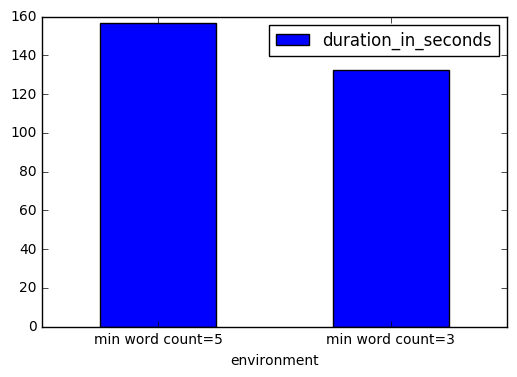

In [25]:
compare_app_csv("chameleon_4_nodes_1000/min_word_count10/app.csv", "chameleon_4_nodes_1000/min_word_count8/app.csv", "compare147.png")

##### Performance Comparison for creating word2vec model for 500 files

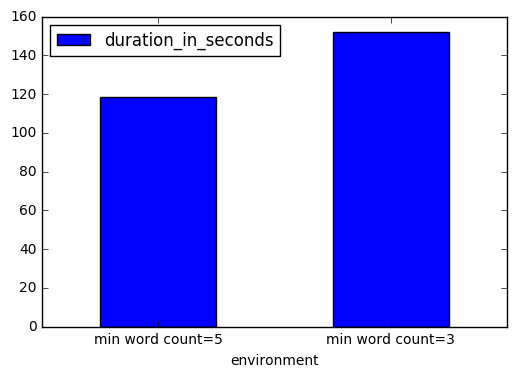

In [26]:
compare_app_csv("chameleon_4_nodes_1000/min_word_count5/app.csv", "chameleon_4_nodes_1000/min_word_count3/app.csv", "compare522.png")

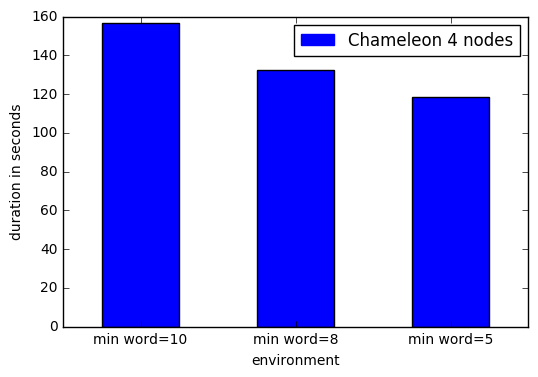

In [27]:
dflist = []
df = pd.read_csv("chameleon_4_nodes_1000/min_word_count10/app.csv", index_col=None, header=0)
df['environment'] = "min word=10"
dflist.append(df)

df = pd.read_csv("chameleon_4_nodes_1000/min_word_count8/app.csv", index_col=None, header=0)
df['environment'] = "min word=8"
dflist.append(df)

df = pd.read_csv("chameleon_4_nodes_1000/min_word_count5/app.csv", index_col=None, header=0)
df['environment'] = "min word=5"
dflist.append(df)


df = pd.concat(dflist)
df['startTime'] = pd.to_datetime(df['startTime'])
df['endTime'] = pd.to_datetime(df['endTime'])
df["duration_in_seconds"] = df["endTime"] - df["startTime"]
df["duration_in_seconds"] = df['duration_in_seconds'] / np.timedelta64(1, 's')
p = df.plot.bar(x='environment', y='duration_in_seconds', rot=360);
p.set_ylabel("duration in seconds")

p.legend_.remove()
blue_patch = mpatches.Patch(color='b', label='Chameleon 4 nodes')
p.legend(handles=[blue_patch])


fig = p.get_figure()
fig.savefig("compare1000files")

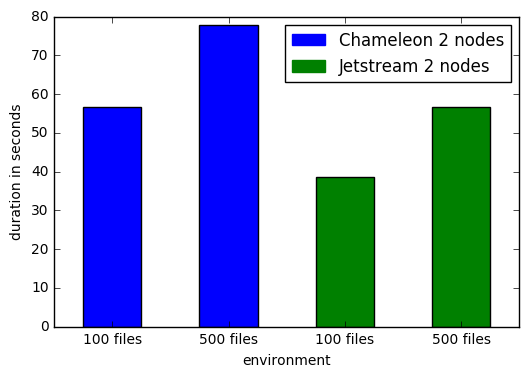

In [28]:
import matplotlib.patches as mpatches
dflist = []
df1 = pd.read_csv("chameleon_2_node/app.csv", index_col=None, header=0)
df1['environment'] = "100 files"
dflist.append(df1)

df2 = pd.read_csv("chameleon_2_node_500/app.csv", index_col=None, header=0)
df2['environment'] = "500 files"
dflist.append(df2)


df3 = pd.read_csv("jetstream_2_nodes/app.csv", index_col=None, header=0)
df3['environment'] = "100 files"
dflist.append(df3)

df4 = pd.read_csv("jetstream_2_nodes_500/app.csv", index_col=None, header=0)
df4['environment'] = "500 files"
dflist.append(df4)

my_colors = ['b', 'b', 'g', 'g']

df = pd.concat(dflist)
df['startTime'] = pd.to_datetime(df['startTime'])
df['endTime'] = pd.to_datetime(df['endTime'])
df["duration_in_seconds"] = df["endTime"] - df["startTime"]
df["duration_in_seconds"] = df['duration_in_seconds'] / np.timedelta64(1, 's')
p = df.plot.bar(x='environment', y='duration_in_seconds', rot=360, color=my_colors)
p.set_ylabel("duration in seconds")
p.legend_.remove()

blue_patch = mpatches.Patch(color='b', label='Chameleon 2 nodes')
green_patch = mpatches.Patch(color='g', label='Jetstream 2 nodes')
p.legend(handles=[blue_patch, green_patch])

fig = p.get_figure()
fig.savefig("ChameleonJetstreamCompare")